EECE454 - Introduction to Machine Learning System

# PA1-3: Fully-Connected Neural Nets & Convolution Neural Nets

made by Minkyu Kim, revised by Minjae Park

## Instructions

In this exercise, you need to implement FCN(Fully Connected Network) on Fashion-MNIST.

Before starting this programming exercise, we strongly recommend to review the lecture notes used in this course.

If you have any questions, please send a mail to TA(mjae.park@postech.ac.kr)

### Fashion-MNIST Data Loading and Preprocessing

In [ ]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import random_split

torch.manual_seed(42)
transform = transforms.Compose([
    transforms.ToTensor(),
    lambda x: x.view(-1)  
])

full_train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)

train_size = int(0.9 * len(full_train_dataset))
valid_size = len(full_train_dataset) - train_size
train_dataset, valid_dataset = random_split(full_train_dataset, [train_size, valid_size])

test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

train_X = torch.stack([data[0] for data in train_dataset])
train_y = torch.tensor([data[1] for data in train_dataset])

valid_X = torch.stack([data[0] for data in valid_dataset])
valid_y = torch.tensor([data[1] for data in valid_dataset])

test_X = torch.stack([data[0] for data in test_dataset])
test_y = torch.tensor([data[1] for data in test_dataset])

## Implementing a Neural Network
In this exercise, we will develop a neural network with fully-connected layers to perform classification and test it out on the Fashion MNIST dataset.

We will use the class `TwoLayerNet` to represent instances of our network. The network parameters are stored in the instance variable `self.params` where keys are string parameter names and values are torch tensors. Below, we initialize toy data and a toy model that we will use to develop your implementation.

<br>

The brief architecture of the TwoLayerNet is like the figure below:

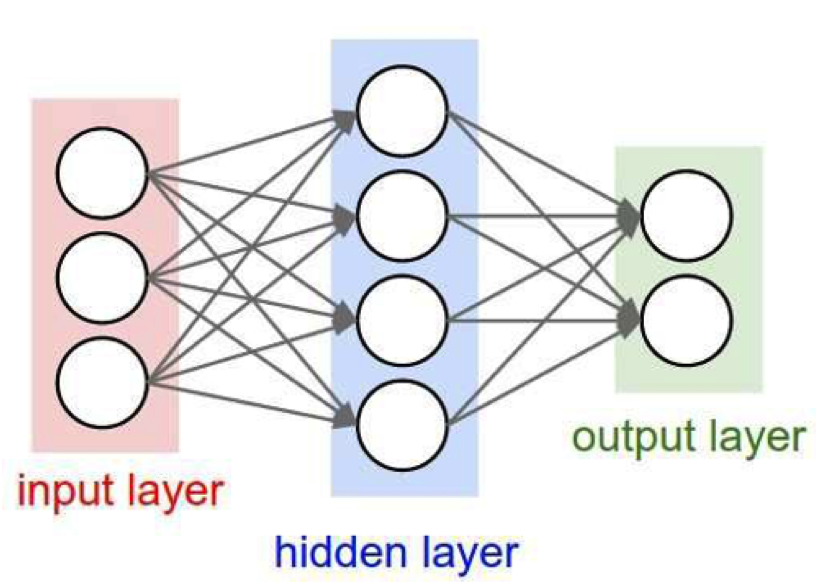

Some operation that is used in the neural network are like below:

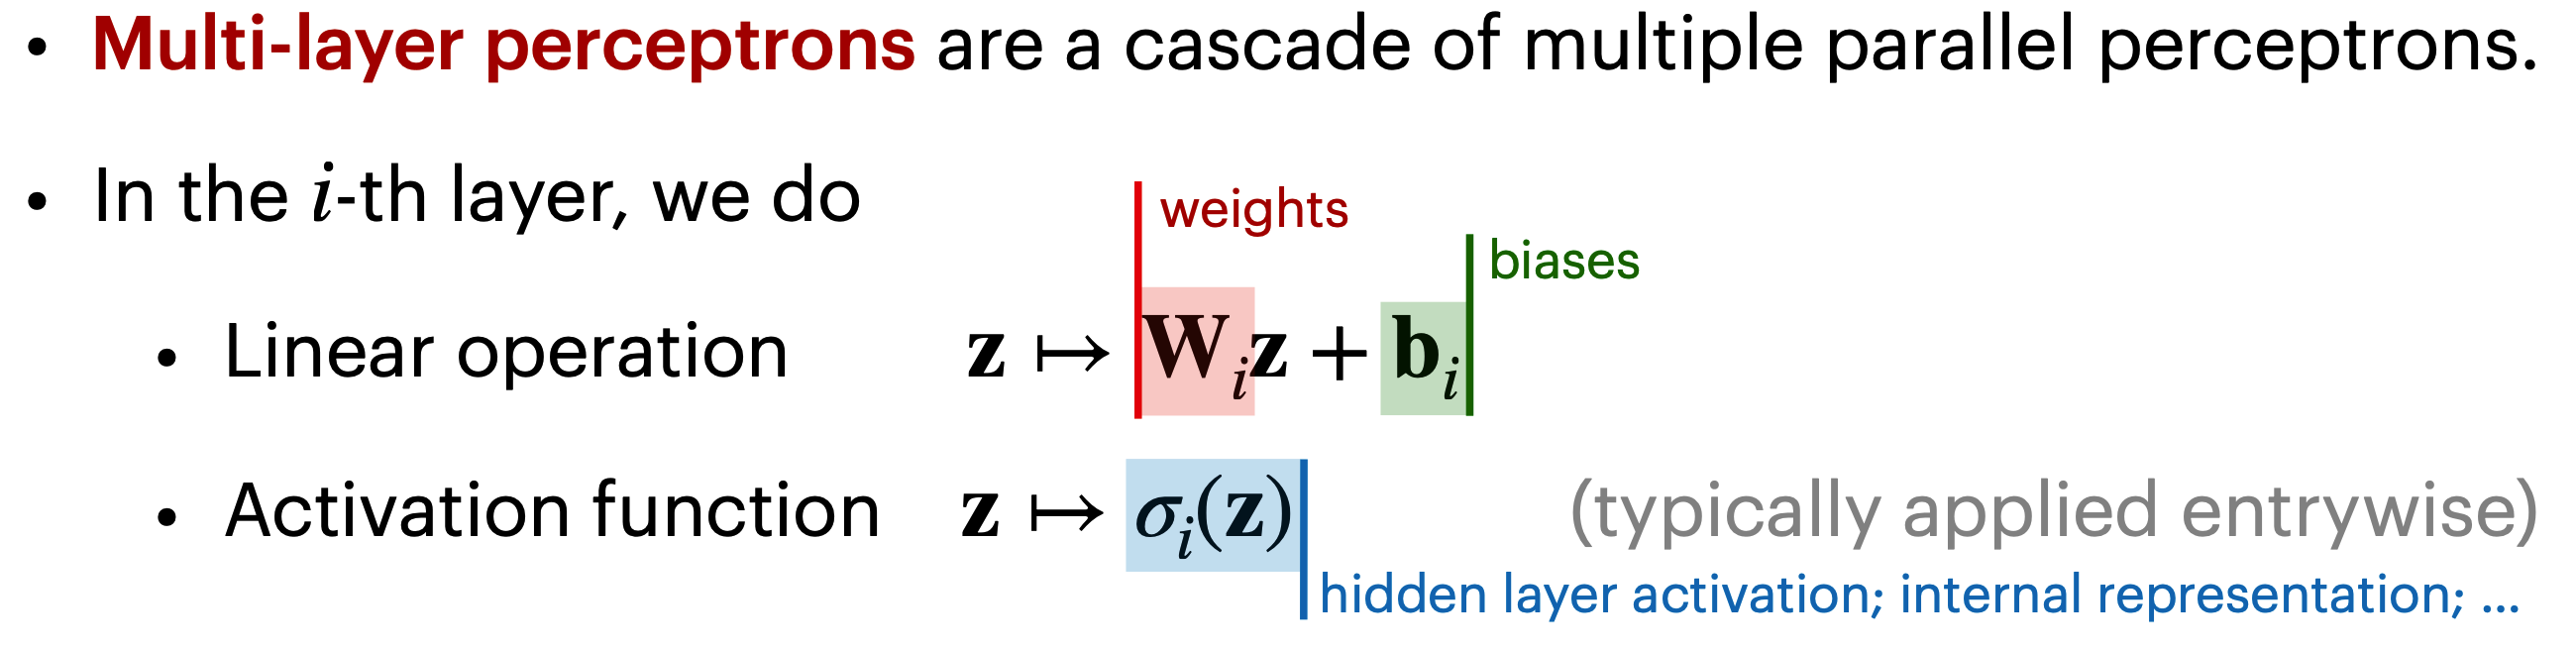

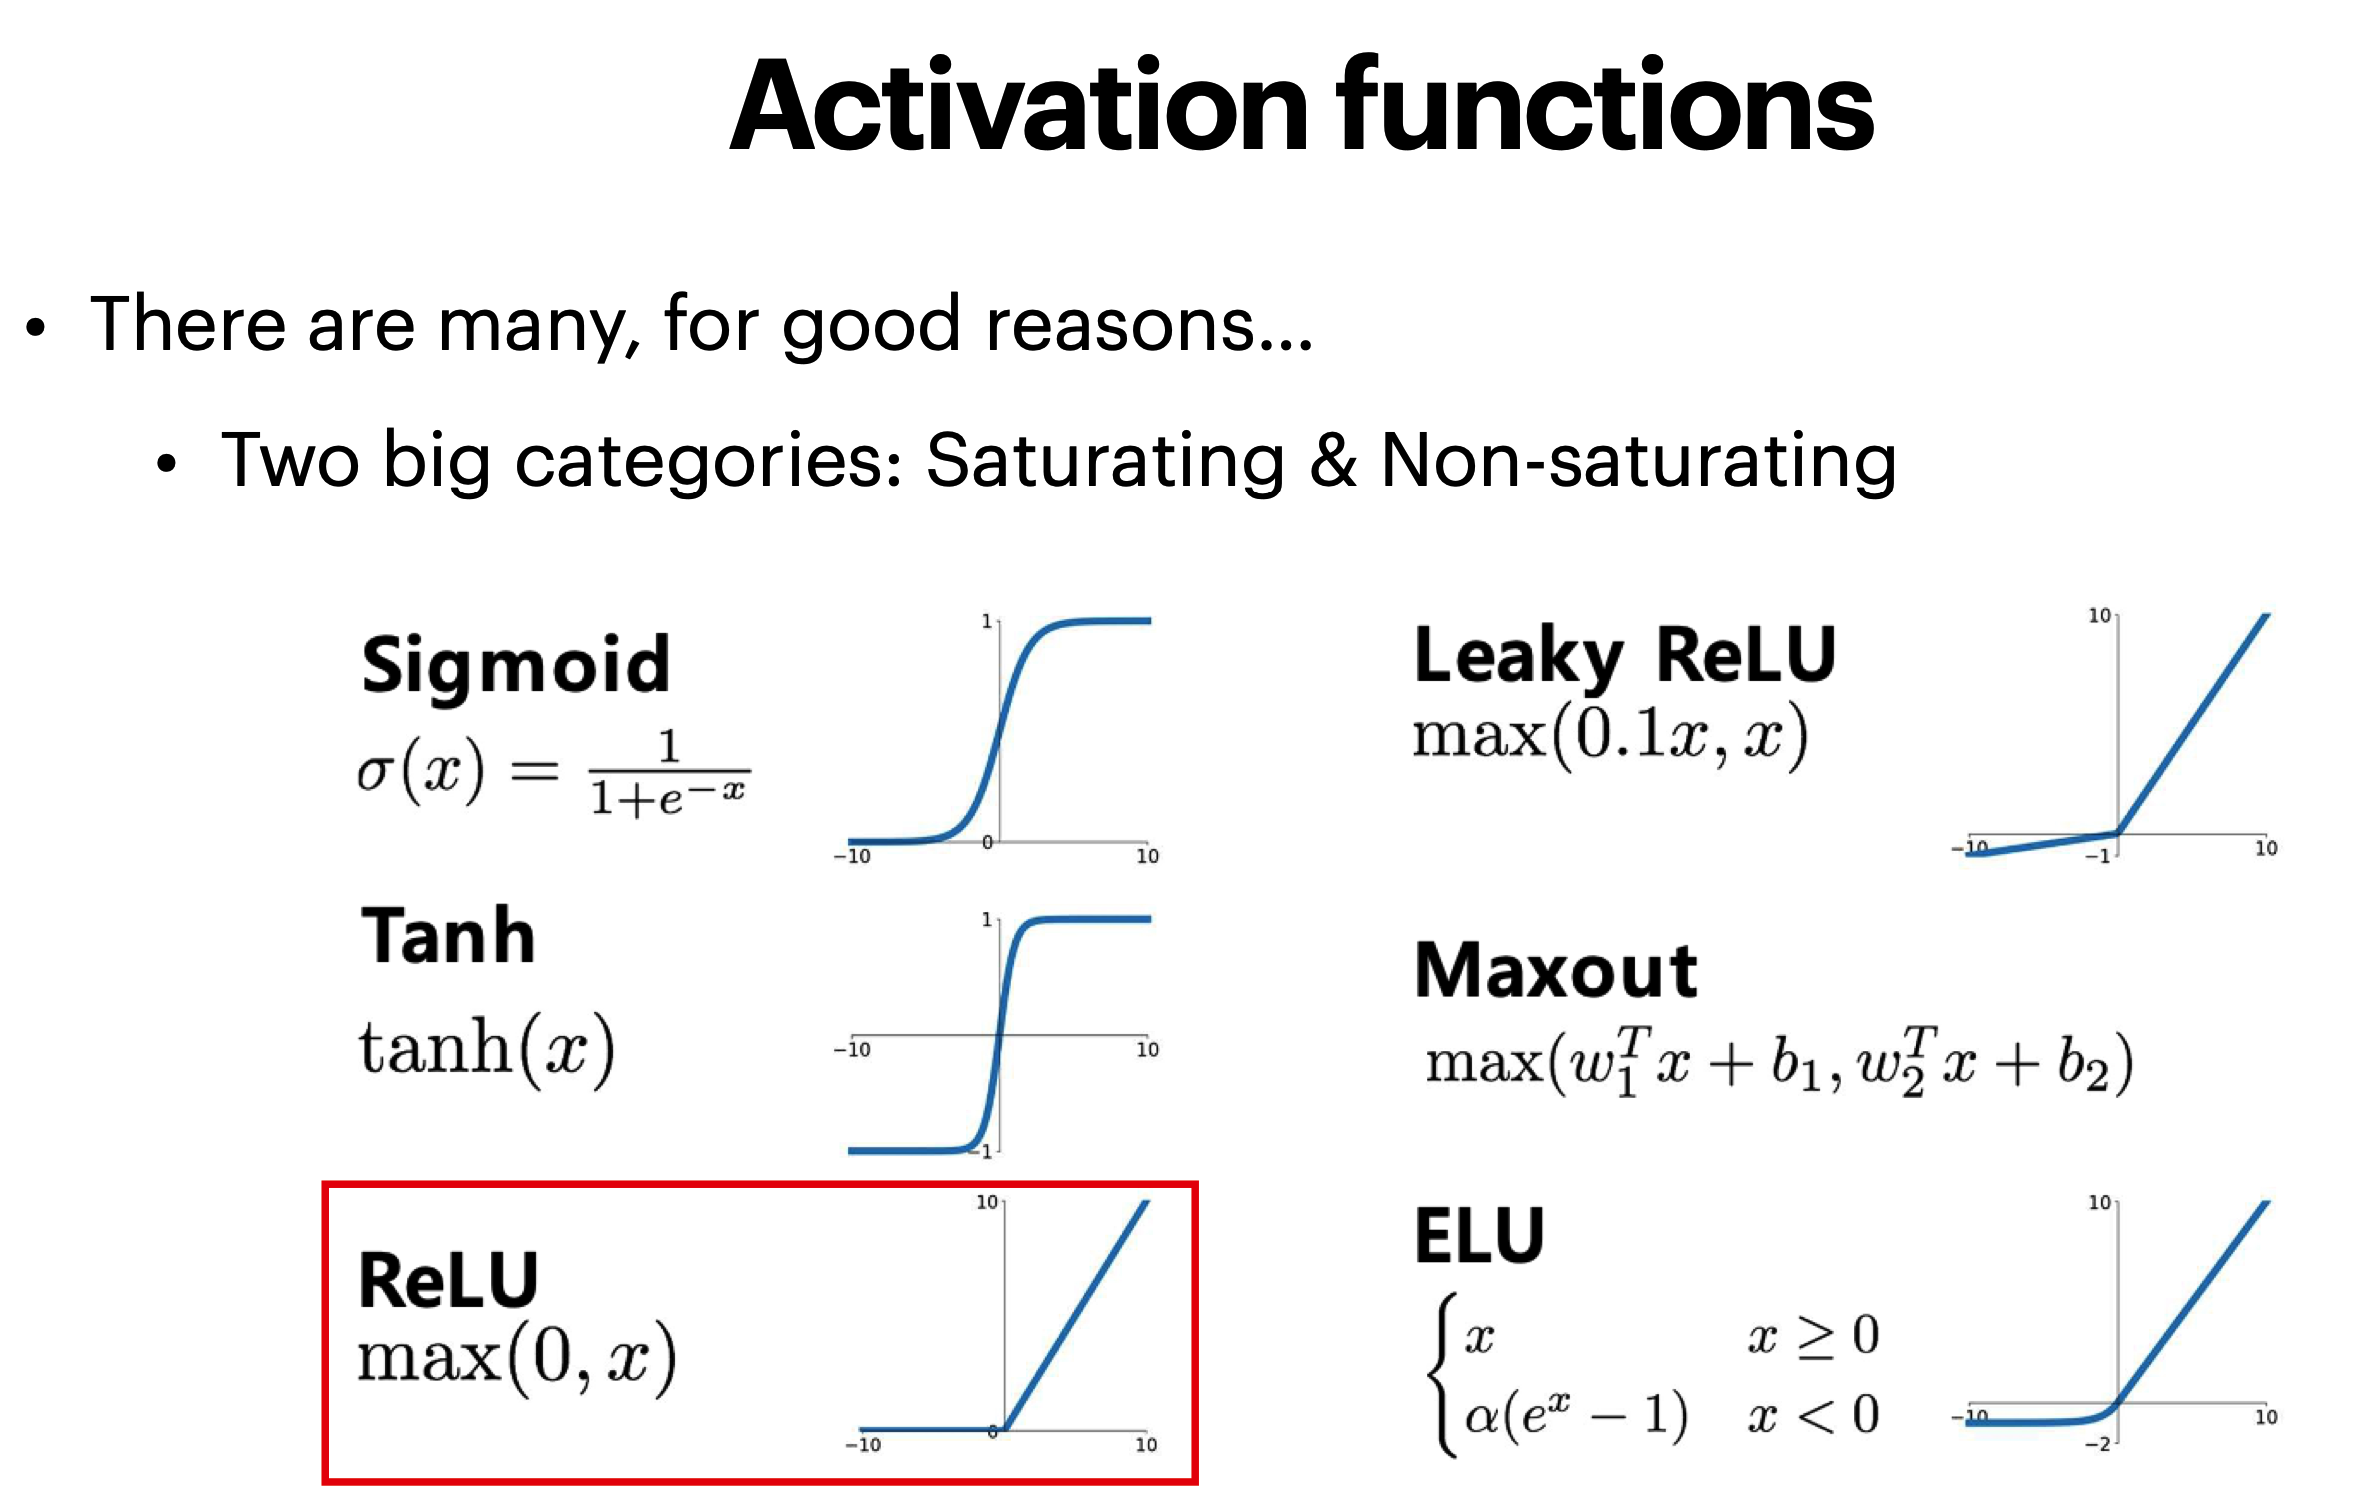

In [ ]:
# Instruction : Implement the 'TwoLayerNet' class

from builtins import object
import torch

class TwoLayerNet(object):
    """
    A two-layer fully-connected neural network. The net has an input dimension of
    N, a hidden layer dimension of H, and performs classification over C classes.
    We train the network with a softmax loss function and L2 regularization on the
    weight matrices. The network uses a ReLU nonlinearity after the first fully
    connected layer.

    In other words, the network has the following architecture:

    input - (fully connected layer) - (ReLU) - (fully connected layer) - (softmax)

    The outputs of the second fully-connected layer are the scores for each class.
    """

    def __init__(self, input_size, hidden_size, output_size, std=1e-4):
        """
        Initialize the model. Weights are initialized to small random values and
        biases are initialized to zero. Weights and biases are stored in the
        variable self.params, which is a dictionary with the following keys:

        W1: First layer weights; has shape (D, H)
        b1: First layer biases; has shape (H,)
        W2: Second layer weights; has shape (H, C)
        b2: Second layer biases; has shape (C,)

        Inputs:
        
        - input_size: The dimension D of the input data.
        - hidden_size: The number of neurons H in the hidden layer.
        - output_size: The number of classes C.
        """
        
        self.params = {}
        self.params['W1'] = std * torch.randn(input_size, hidden_size)
        self.params['b1'] = torch.zeros(hidden_size)
        self.params['W2'] = std * torch.randn(hidden_size, output_size)
        self.params['b2'] = torch.zeros(output_size)

    def ReLU(self, X):
        ###################################################
        # TODO: Implement the ReLU activation function    # 
        ###################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    def SoftMax(self, X):
        #########################################################################
        # TODO: Implement the SoftMax activation function                       #
        #########################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    def forward(self, X):
        """
        The method that calculate the output of neural net by using input data(i.e. X) for training
        
        Inputs:
        X: a torch tensor of size(N, D)
        
        Outputs:
        out : a torch tensor of size(N, number_of_classes)
        (Note that in forward(), you should not use Softmax)
        """

        out = None
        #########################################################################
        # TODO: Implement the code that gets ouptut by using input data and     #
        # the parameter of models(i.e. weight, bias) and ReLU                   #
        #########################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

        return out

    def prediction(self, X):
        """
        The method that calculate the output of neural net by using input data(i.e. X) for prediction
        
        Inputs:
        X: a torch tensor of size(N, D)
        
        Outputs:
        pred : a torch tensor of size(N, number_of_classes) that represent a probability
        """

        pred = self.forward(X)
        pred = self.SoftMax(pred)

        return pred

In [ ]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

# The expected output of print() is like below
# =====================================================
# X: tensor([[0., 0.],
#         [0., 1.],
#         [1., 0.],
#         [1., 1.]])
# y: tensor([0, 1, 1, 0])

# y_hat: tensor([[ 0.0000,  0.0000],
#         [ 0.0025, -0.0019],
#         [-0.0009, -0.0014],
#         [ 0.0015, -0.0034]])
# prediction: tensor([[0.5000, 0.5000],
#         [0.5011, 0.4989],
#         [0.5001, 0.4999],
#         [0.5012, 0.4988]])
# sum of pred prob. for each input: tensor([1., 1., 1., 1.])
# =====================================================

input_size = 2
hidden_size = 2
output_size = 2 

torch.random.manual_seed(42)
net_toy = TwoLayerNet(input_size, hidden_size, output_size, std=1e-1)
X = torch.Tensor([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

y = torch.Tensor([0, 1, 1, 0]).long()


y_hat = net_toy.forward(X)
pred = net_toy.prediction(X)

print(f"X: {X}")
print(f"y: {y}\n")

print(f"y_hat: {y_hat}")
print(f"prediction: {pred}")
print(f"sum of pred prob. for each input: {pred.sum(dim=1)}")

Next, we need loss function for training the neural network.

In [ ]:
def loss_function(net, X, y, n_cls):
    """
    The method that calculate the loss that is used to train the neural network.
    For training the neural network, we use the CrossEntropyLoss that is usually used for training classification.
    (CrossEntropyLoss: https://gombru.github.io/2018/05/23/cross_entropy_loss/)
    Inputs:
        
    - net: The neural network
    - X, y: training data pair(X: input, y: label)
    """
    y_hat = net.forward(X) 
    loss = None
    ###################################################################################
    # TODO: Implement the CrossEntropyLoss                                            #
    # Hint: use torch.nn.functional.one_hot(y, num_classes=n_cls) to make label       #
    ###################################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    return loss.item()

In [ ]:
# Check if the implemented loss function creates same result with the same thing that is in the pytorch module

loss_from_implemented_method = loss_function(net_toy, X, y, output_size)

label = torch.nn.functional.one_hot(y, num_classes=output_size)
loss_from_pytorch_module = torch.nn.functional.cross_entropy(y_hat, label.type(torch.FloatTensor))

print(f"loss_from_implemented_method: {loss_from_implemented_method}, loss_from_pytorch_module: {loss_from_pytorch_module}")
print(f"distance: {torch.abs(loss_from_implemented_method - loss_from_pytorch_module).item()}")

After implementing the loss function, we need to compute the gradient of the loss with respect to each parameters(weight, bias)

In [ ]:
def get_gradient(net, X, y, n_cls):
    """
    The method that compute the gradient with respect to parameters
    Inputs:
    - net: The neural network
    - X, y: training data pair(X: input, y: label)
    """
    gradient = {key: None for key in list(net.params.keys())}
    #############################################################################################################################################
    # TODO: Implement the backward pass                                                                                                         #
    # Hint: if the result of cross entropy loss 'L' and the output of network 'y_hat' and label 'y' are exist, then dL/dz = softmax(y_hat) - y  #
    # (reference : https://towardsdatascience.com/derivative-of-the-softmax-function-and-the-categorical-cross-entropy-loss-ffceefc081d1)       # 
    # Therefore, we do not use loss as the input of get_gradient()                                                                              #
    #############################################################################################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    return gradient

Last, by using the gradients, we can update the parameters of neural network. <br>
For updating the parameters, we use SGD as optimizing method. (we will learn more about optimizers in PA2-4)

In [ ]:
gradient = get_gradient(net_toy, X, y, output_size)

# Check the size of parameteres and gradients
print(f"The size of W1, b1: {net_toy.params['W1'].size()}, {net_toy.params['b1'].size()}")
print(f"The size of W2, b2: {net_toy.params['W2'].size()}, {net_toy.params['b2'].size()}")
print(f"The size of grad_W1, grad_b1: {gradient['W1'].size()}, {gradient['b1'].size()}")
print(f"The size of grad_W2, grad_b2: {gradient['W2'].size()}, {gradient['b2'].size()}")

In [ ]:
def update_network(net, grads, learning_rate) :
    """
    The method that update the parameters of network by using the gradient
    Inputs:
    - net: The neural network
    - grad: Gradients with respect to weight/bias
    - learning_rate: determines the step size 
    """

    for key in list(net.params.keys()) :
        net.params[key] -= learning_rate*grads[key]
    
    return net

## Warm up: Solve XOR Problem with 2-layer neural network.

Before we train this model on Fashion-MNIST, we can first try XOR problem to check whether the function you designed works well. 

In [ ]:
# Check the update_network works properly
# Expected output of print()
# =====================================================
# === Parameters Before Training ===
# W1: tensor([[0.0337, 0.0129],
#         [0.0234, 0.0230]])
# b1: tensor([0., 0.])

# W2: tensor([[-0.1123, -0.0186],
#         [ 0.2208, -0.0638]])
# b2: tensor([0., 0.])

# === Parameters After Training ===
# W1:
# tensor([[1.7256, 2.3513],
#         [1.7251, 2.3507]])
# b1: tensor([-0.0027, -2.3473])

# W2:
# tensor([[-1.7872,  1.6563],
#         [ 2.9396, -2.7826]])
# b2: tensor([ 1.1891, -1.1891])

# === Difference in Parameters (After - Before) ===
# W1:
# tensor([[1.6920, 2.3384],
#         [1.7016, 2.3277]])
# b1: tensor([-0.0027, -2.3473])

# W2:
# tensor([[-1.6749,  1.6749],
#         [ 2.7188, -2.7188]])
# b2: tensor([ 1.1891, -1.1891])
# =====================================================
import copy

learning_rate = 1e-1 
#storing inital parameters
net_toy_before_training = copy.deepcopy(net_toy)
params_before_training = copy.deepcopy(net_toy.params)

num_epochs = 1000

for epoch in range(num_epochs):
    ######################################################################################################
    # TODO: Implement the training                                              
    # Hint: use loss_function, get_gradient, update_network above         
    ######################################################################################################  
     # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
     
    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    if (epoch+1) % 100 == 0:
        pred = net_toy.prediction(X)
        _, predicted = torch.max(pred, 1)
        accuracy = (predicted == y).sum().item() / y.size(0) * 100
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss:.4f}, Accuracy: {accuracy:.2f}%')
#storing trained parameters
params_after_training = net_toy.params

print("\n=== Parameters Before Training ===")
for key in params_before_training:
    print(f"{key}:\n{params_before_training[key]}\n")

print("=== Parameters After Training ===")
for key in params_after_training:
    print(f"{key}:\n{params_after_training[key]}\n")

print("=== Difference in Parameters (After - Before) ===")
for key in params_before_training:
    diff = params_after_training[key] - params_before_training[key]
    print(f"{key}:\n{diff}\n")

In [ ]:
# Expected output of print()
# =====================================================
# === Outputs Before Training ===
# Predictions: tensor([0, 0, 0, 0])
# Actual Labels: tensor([0, 1, 1, 0])
# Accuracy Before Training: 50.00%

# === Outputs After Training ===
# Predictions: tensor([0, 1, 1, 0])
# Actual Labels: tensor([0, 1, 1, 0])
# Accuracy After Training: 100.00%
# =====================================================

print("=== Outputs Before Training ===")
y_hat_before = net_toy_before_training.forward(X)
pred_before = net_toy_before_training.prediction(X)
_, predicted_before = torch.max(pred_before, 1)
accuracy_before = (predicted_before == y).sum().item() / y.size(0) * 100
print(f"Predictions: {predicted_before}")
print(f"Actual Labels: {y}")
print(f"Accuracy Before Training: {accuracy_before:.2f}%\n")

print("=== Outputs After Training ===")
y_hat_after = net_toy.forward(X)
pred_after = net_toy.prediction(X)
_, predicted_after = torch.max(pred_after, 1)
accuracy_after = (predicted_after == y).sum().item() / y.size(0) * 100
print(f"Predictions: {predicted_after}")
print(f"Actual Labels: {y}")
print(f"Accuracy After Training: {accuracy_after:.2f}%")

### Train the model using Fashion-MNIST 

In [ ]:
# Next, we train the neural network by using the Fashion-MNIST
# We use train dataset to train the neural network, 
# validation dataset to check the performance in the training proceess
# then use test dataset for evaluation after training

from tqdm import tqdm

def train(net, train_X, train_y, valid_X, valid_y, learning_rate, epochs, batch_size, n_cls):
    """
    The method for training the model. 
    train() uses batch_size pair of X & y data in each forward and backward process.
    (i.e. we update paramters at (num_of_train_data/batch_size) times in each epoch)
    
    Inputs:
    - net: The neural network
    - train_X, train_y: training dataset
    - learning_rate: determines the step size 
    - batch_size: determines how many data to use in each parameter updating
    """
    
    train_loss_history = []
    valid_loss_history = []
    for epoch in range(epochs):
        num_iter = train_X.size(0) // batch_size
        
        mean_train_loss = 0.0
        for i in tqdm(range(num_iter), desc=f"train, epoch: {epoch + 1}"):
            ######################################################################################################
            # TODO: Implement the training part of train() method.                                               #
            # In this part, you need to add the loss to mean_train_loss that is appended to 'train_loss_history' #
            ######################################################################################################
            # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

            # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

        mean_train_loss /= num_iter
        train_loss_history.append(mean_train_loss)
        
        mean_valid_loss = 0.0
        valid_batch_size = 10  
        valid_num_iter = valid_X.size(0) // valid_batch_size

        for i in tqdm(range(valid_num_iter), desc=f"valid, epoch: {epoch + 1}"):
            ######################################################################################################
            # TODO: Implement the validation part of train() method.                                             #
            # In this part, you need to add the loss to mean_valid_loss that is appended to 'valid_loss_history' #
            ######################################################################################################
            # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

            # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        mean_valid_loss /= valid_num_iter
        valid_loss_history.append(mean_valid_loss)
        
        print(f"Epoch [{epoch+1}/{epochs}], Train Loss: {mean_train_loss:.4f}, Valid Loss: {mean_valid_loss:.4f}")
    
    return net, train_loss_history, valid_loss_history

def test(net, test_X, test_y):
    acc = None
    ##################################################################################################
    # TODO: Implement the test()                                                                     #
    # Hint: If you get accuracy of one input data, you should reshape the size of input as [1, 3072] #                                                              
    ##################################################################################################
    answer_count = 0
    total_count = test_X.size(0)
    for idx in range(total_count):
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    acc = answer_count / total_count
    return acc

In [ ]:
# Check the implemented methods work properly

# before use the dataset, we need to normalize the data
# in this case, we normalize the data by rescaling to [0, 1]


epochs = 10
batch_size = 98
learning_rate = 1e-3

input_size = 784
hidden_size = 392
num_classes = 10

torch.random.manual_seed(42)
net_fashion_mnist = TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

net_fashion_mnist, train_loss_history, valid_loss_history = train(
    net_fashion_mnist, train_X, train_y, valid_X, valid_y,
    learning_rate, epochs, batch_size, num_classes
)

test_accuracy = test(net_fashion_mnist, test_X, test_y)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

In [ ]:
import matplotlib.pyplot as plt

plt.plot(train_loss_history, label="train_loss")
plt.scatter(x=range(epochs), y=train_loss_history)
plt.plot(valid_loss_history, label="valid_loss")
plt.scatter(x=range(epochs), y=valid_loss_history)
plt.xlabel('Epoch')
plt.ylabel('Loss value')
plt.legend()
plt.show()

In [ ]:
acc = test(net_fashion_mnist, test_X, test_y)
print(f"accuracy: {100*acc:.2f}%, expected value (app.) : 78.04%")

## Train Convolution Neural Network on Fashion-MNIST

In this section, we will implement same tasks before but on Convolution Neural Networks. 

For simpler approach, you can now use functions from torch like  torch.nn.Conv2d(), ReLU(), MaxPool2d(),

which can calculate loss and backward propagation automatically.

What you have to do is, modify input image's shape into desirable shape for CNN and design forward propagation of CNN.

Limitations are total number of convolution layer and fc layer must not exceed 4 and the test result must be better then 70.89%

The computation of Convolution is like the figure below: <br>
(reference: https://bios691-deep-learning-r.netlify.app/slides/20_CNN.pdf)

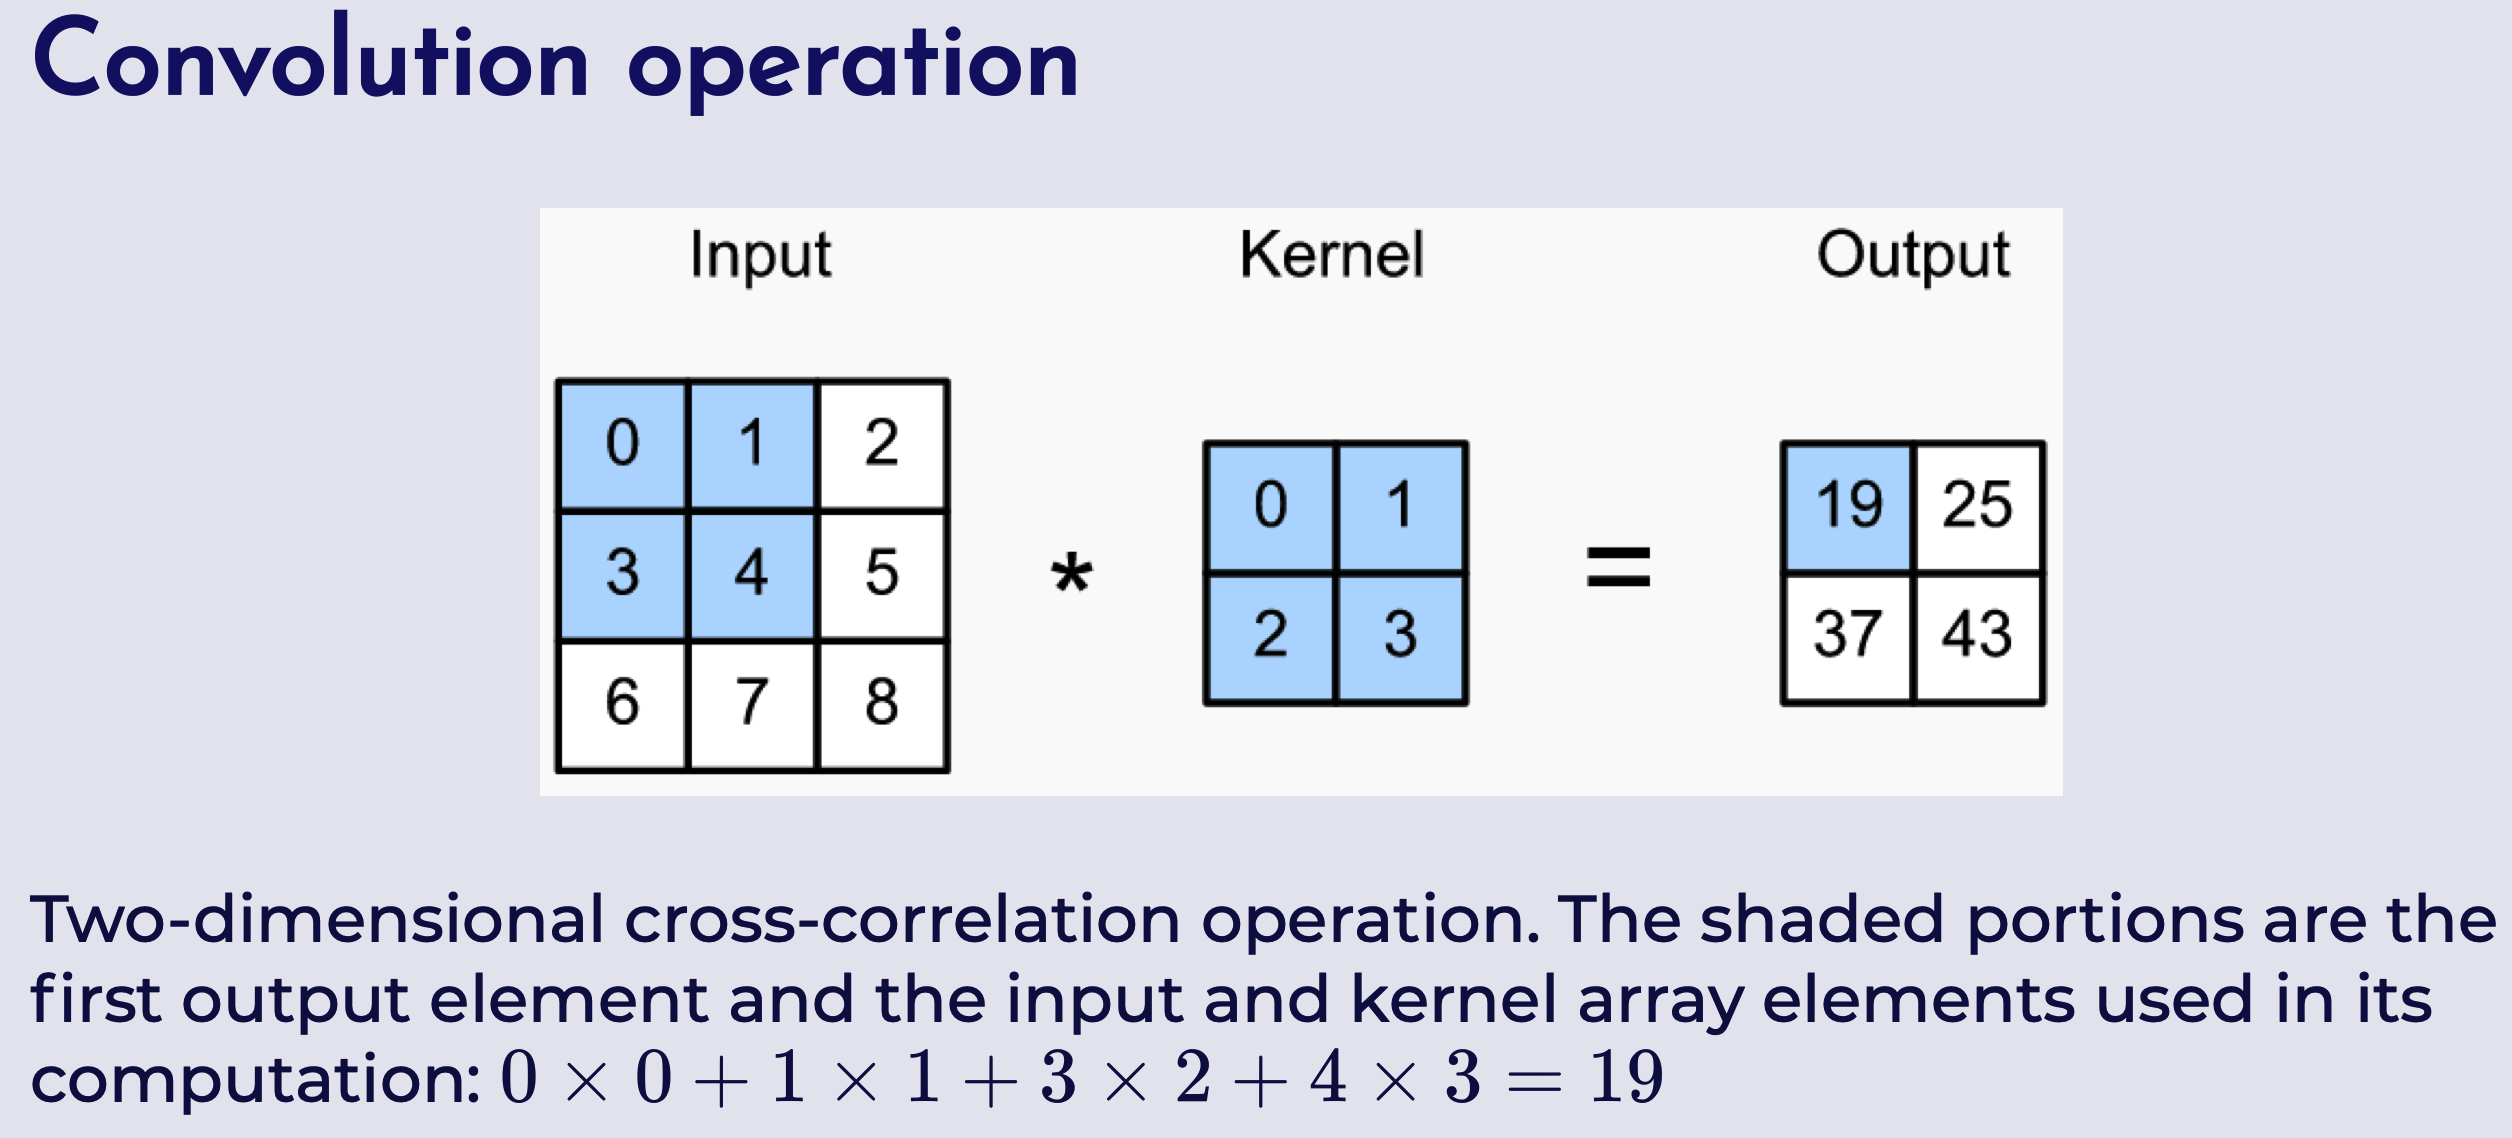

In [ ]:
print(f"train_X shape: {train_X.shape}")
print(f"train_y shape: {train_y.shape}")
print(f"valid_X shape: {valid_X.shape}")
print(f"valid_y shape: {valid_y.shape}")
print(f"test_X shape: {test_X.shape}")
print(f"test_y shape: {test_y.shape}")

In [ ]:
######################################################################################################
# TODO: Use view() function to modify shape of image (N,784)-> (N,1,28,28) and normalize   
# Normalization method is up to you.                                      #
######################################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

In [ ]:
print(f"train_X shape: {train_X.shape}")
print(f"train_y shape: {train_y.shape}")
print(f"valid_X shape: {valid_X.shape}")
print(f"valid_y shape: {valid_y.shape}")
print(f"test_X shape: {test_X.shape}")
print(f"test_y shape: {test_y.shape}")

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

class CNNNet(nn.Module):
    def __init__(self):
        super(CNNNet, self).__init__()

        ######################################################################################################
        # TODO: Design CNNNet 
        # Hint: Use nn.Conv2d(), nn.MaxPool2d(), and nn.Linear() and other more
        # Limitation: Total number of layer must not exceed 4. Channel num must not exceed 64.                             
        ######################################################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    def forward(self, x):
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        return x

In [ ]:
model = CNNNet()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
def train_model(model, train_X, train_y, valid_X, valid_y, criterion, optimizer, num_epochs):
    train_loss_history = []
    valid_loss_history = []
    train_acc_history = []
    valid_acc_history = []
    
    for i in tqdm(range(num_epochs), desc=f"train, epoch: {epoch + 1}"):
        ######################################################################################################
        # TODO: Design train procedure, calculate train_loss, train_acc, valid_loss, and valid_acc and append these values to list above
        # Hint: Use train() for training procedure and eval() for validation, torch.nn.CrossEntropyLoss.backward() automatically calculates gradients
        #       torch.optim.Adam.step() automatically updates parameters by using gradients. Use these functions wisely!
        #                             
        ######################################################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        
        print(f'Epoch [{epoch+1}/{num_epochs}] '
              f'Train Loss: {train_loss:.4f} Acc: {train_acc:.4f} '
              f'Valid Loss: {valid_loss.item():.4f} Acc: {valid_acc:.4f}')
    
    return model, train_loss_history, valid_loss_history, train_acc_history, valid_acc_history

In [ ]:
num_epochs = 10

model, train_loss_history, valid_loss_history, train_acc_history, valid_acc_history = train_model(
    model, train_X, train_y, valid_X, valid_y, criterion, optimizer, num_epochs)

In [ ]:
def test_model(model, test_X, test_y):
    ######################################################################################################
    # TODO: Design test procedure
    # Hint: If you properly designed validation process, it is not actually different process at all.                          
    ######################################################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    
    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    print(f'Test Accuracy: {test_acc * 100:.2f}%')
    return test_acc

test_accuracy = test_model(model, test_X, test_y)

In [ ]:
import matplotlib.pyplot as plt

epochs_range = range(1, num_epochs + 1)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_loss_history, label='Train Loss')
plt.plot(epochs_range, valid_loss_history, label='Valid Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_acc_history, label='Train Acc')
plt.plot(epochs_range, valid_acc_history, label='Valid Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()